## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822#section-2).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [12]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [13]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp2/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


### Explore the dataset

- how many examples are there in the dataset?

    308
- how many features for each example?

    6
- what is the ground truth of the 10th example

    1.83

In [14]:
# loads the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


The following command adds a column to the inputs.

- what is in the value added this column?

 There is only 1 in the column added
- why are we doing this?

    It is necessary to calculate the perceptron

In [15]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)


           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/tp2/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [16]:
w = [0 for i in range(7)]

def h(w, x):
    heuristique = 0
    for i in range(len(x)):
        heuristique += w[i]*x[i]
    return (heuristique)

print("Estimated value for first example",h(w,X[0]),end = " ")
print()
print("Ground truth for first example",Y[0],end = " ")

# print the ground truth and the evaluation of h_w on the first example

Estimated value for first example 0.0 
Ground truth for first example 8.62 

## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [17]:
def loss(w, x, y):
    return ((h(w,x) - y)**2)

print("Loss for first example:")
print(loss(w,X[0],Y[0]))

Loss for first example:
74.30439999999999


## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [18]:
def emp_loss(w, X, Y):
    a = 0
    for i in range(len(Y)):
        a += loss(w,X[i],Y[i])
    a = a/len(Y)
    return a
    
print(emp_loss(w,X,Y))

339.2467464285712


## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

If you are not sure about the gradient computation, check out the [perceptron slides](https://moodle.insa-toulouse.fr/pluginfile.php/120391/mod_resource/content/1/cm1.pdf) on [Moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822) (in particular, slide 26). Make sure this computation is clear to you!

In [19]:
def compute_update(w, X, Y, alpha):
    for i in range(len(w)):
        somme = 0
        for j in range(len(Y)):
            somme += (Y[j] - h(w,X[j]))*X[j][i]
        w[i] = w[i] + (alpha * (somme))

compute_update(w, X, Y, alpha = 10e-7)

## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [34]:
def descent(w_init, X, Y, alpha, max_iter,mod_affiche): #mod_affiche pour pas retourner toutes les valeurs
    listeDeRetour = []
    for i in range(max_iter):
        compute_update(w_init, X, Y,alpha)
        if (i%mod_affiche == 0):
            listeDeRetour.append(emp_loss(w,X,Y))
            print(emp_loss(w,X,Y))
    return listeDeRetour
        
        


## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
    - alpha = 10e-7
    - Max_iter = 800
- What is the loss associated with the final model?
    - 78.45179944864248
- Is the final model the optimal one for a perceptron?


231.89139974132914
219.9893841673471
211.29677681741438
203.15760193635933
195.5256492760826
188.36754925312027
181.65350267640198
175.35578876056698
169.44844803681508
163.90714578389796
158.70906723704726
153.83282242088094
149.25835720681607
144.96686989116034
140.94073294807464
137.16341965390157
133.61943528985148
130.29425264212
127.17425153302362
124.24666213207125
121.49951181101396
118.92157532144115
116.50232808723705
114.23190241715837
112.10104645495723
110.10108569588081
108.22388690908102
106.46182431550073
104.80774788020713
103.25495358696531
101.79715557110579
100.42845999449658
99.14334055369166
97.9366155191379
96.80342620971425
95.7392168128524
94.73971546611222
93.80091652133453
92.91906391743406
92.09063559251456
91.31232887032255
90.58104676012225
89.89388511288035
89.24812058022091
88.64119932596198
88.07072644317654
87.53445603267195
87.03028190153086
86.55622884295067
86.11044446103516
85.69119150647053
85.29684069114556
84.9258639517704
84.5768281344273
84.24

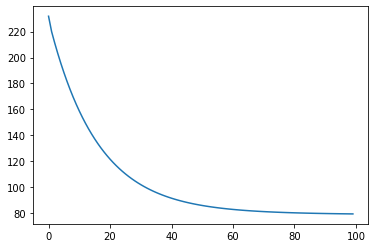

In [36]:
from matplotlib import pyplot as plt
w = [0 for i in range(7)]

listeExamples = descent(w,X,Y,10e-5,10000,100)

plt.plot(listeExamples)



In [31]:
print(listeExamples)

[231.89139974132914, 211.29677681741438, 195.5256492760826, 181.65350267640198, 169.44844803681508, 158.70906723704726, 149.25835720681607, 140.94073294807464, 133.61943528985148, 127.17425153302362, 121.49951181101396, 116.50232808723705, 112.10104645495723, 108.22388690908102, 104.80774788020713, 101.79715557110579, 99.14334055369166, 96.80342620971425, 94.73971546611222, 92.91906391743406, 91.31232887032255, 89.89388511288035, 88.64119932596198, 87.53445603267195, 86.55622884295067, 85.69119150647053, 84.9258639517704, 84.24838907373498, 83.6483365449352, 83.11653037754186, 82.6448973590781, 82.22633383376649, 81.85458860751152, 81.5241600237325, 81.23020549382099, 80.96846197390512, 80.73517606231529, 80.52704255273099, 80.34115041910697, 80.17493533251523, 80.02613791903468, 79.89276706362, 79.77306764907586, 79.66549219325144, 79.56867591259953, 79.48141479739638, 79.4026463341441, 79.33143255482099, 79.26694513143902, 79.20845226846349]


Text(0, 0.5, 'f(examples)')

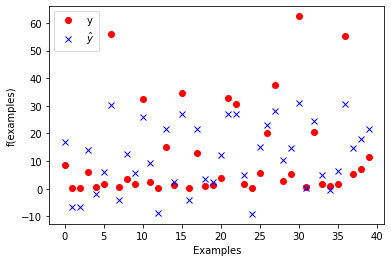

In [113]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
from matplotlib import pyplot as plt
num_samples_to_plot = 40
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")







# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.

### Improvements to gradient descent

Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```

Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?

In [75]:
def descent_upgraded(w_init, X, Y, alpha, max_iter,mod_affiche,delta_halt): #mod_affiche pour pas retourner toutes les valeurs
    listeDeRetour = []
    last_value = 100000
    i = 0
    stop = False
    while ( not(stop) and i < max_iter):
        
        compute_update(w_init, X, Y,alpha)
        
        if (i%mod_affiche == 0):
            listeDeRetour.append(emp_loss(w,X,Y))
            print(emp_loss(w,X,Y))
            if (abs(emp_loss(w,X,Y) - last_value) < delta_halt):
                stop = True
            last_value = emp_loss(w,X,Y)
            
        i+=1
    return listeDeRetour

228.67073384941122
217.72184045351062
209.17194078347202
201.17409215641422
193.67548762366417
186.64231847133885
180.0451967421579
173.8568970709651
168.0519355127724
162.60642264298508
157.49796020167705
152.7055481615513
148.20949770805524
143.99134947418767
140.03379677786717
136.3206136092535
132.83658709980207
129.56745420509228
126.49984234299703
123.6212137419088
120.91981326785393
118.38461951329444
116.00529894379686
113.77216291141713
111.67612735557127
109.70867502335597
107.8618200517872
106.12807476427074
104.50041854285575
102.97226864647875
101.53745285351744
100.19018381458979
98.92503500865855
97.73691820219375
96.62106231741231
95.57299362148923
94.58851715414652
93.66369931619037
92.79485154640507
91.97851501875708
91.21144629611305
90.49060388066708
89.81313560501097
89.17636681128705
88.57778926915196
88.01505078635661
87.4859454686396
86.98840458833779
86.52048802365607
86.08037623291827
85.66636273035157
85.2768470320498
84.9103280427198
84.56539785565323
84.240

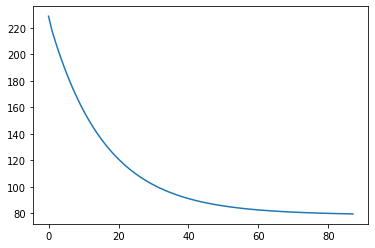

In [79]:
w = [1 for i in range(7)]

listeExamples = descent_upgraded(w,X,Y,10e-5,20000,100,0.05)

plt.plot(listeExamples)